# Hands-on experience on the exponential pdf

## Sampling from an exponential distribution

Let's begin by remebering that the exponential probability density function is


$$
p(x;\lambda)=\lambda e^{-\lambda x}
$$

or, alternatively,

$$
p(x;\theta)=\frac{1}{\theta} e^{\textstyle{-\frac{x}{\theta}}}.
$$

We can randomly extract from the said distribution $N=100000$ times, using $\lambda=1\;(=\theta)$

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
if IN_COLAB:
    !pip install zfit

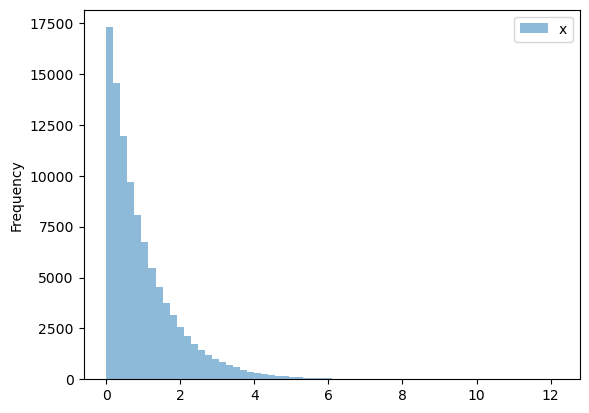

In [2]:
N = 100000
df = pd.DataFrame({'x':np.random.exponential(scale= 1, size=N)})
ax = df.plot.hist(bins=64, alpha=0.5)

We can calculate the sample mean and variance<br>
$$
\overline{x}=\frac{1}{N}\sum_{i=1}^{N}x_i\qquad s^2=\frac{1}{N-1}\sum_{i=1}^{N}\left(x_i-\overline{x}\right)^2
$$

In [3]:
mean = df.mean()[0]
print(f'The sample mean value is {mean}')

The sample mean value is 0.9958293826737472


In [4]:
var = df.var()[0]
print(f'The sample variance value is {var}')

The sample variance value is 0.9934300123847077


## The likelihood function

Given $N$ samples extracted from an exponential distribution, the likelihood function is

$$
\mathcal{L}(\lambda; x) = \prod_{i=1}^{N} \lambda e^{-\lambda x_i}.
$$


The MLE exstimator for $\lambda$ can be extracted from

$$
\log\left(\mathcal{L}\right) = N\log(\lambda) - \sum_{i=1}^N x_i,\quad \textrm{by imposing} \quad\frac{\partial\log(\mathcal{L})}{\partial\lambda} = 0,
$$

which returns the result of
$$
\hat{\lambda}_{MLE}=\frac{N}{\sum_{i=1}^N x_i}.
$$
Here we can see how the likelihood shape and $\hat{\lambda}_{MLE}$ change as $N$ increases.

lambda_mle (N = 1) = [1.7507963962558346, 0.406631608309397, 2.7496126477784286, 3.0542488295975287, 1.2349332104143698, 2.847207376593578, 2.3536511467938954, 0.4526636141294205]
lambda_mle (N = 2) = [0.6599795246240677, 2.8939357853594854, 1.7226799868102327, 0.7592963193886668, 1.6713578858333407, 0.5730670313150955, 0.7636569427643984, 1.1951446820377307]
lambda_mle (N = 5) = [1.1034463829969068, 1.1956370956728515, 0.779847108945551, 1.2473228147959414, 0.9404686218590145, 1.1805848661917258, 1.0871610364688278, 0.7299666222051154]
lambda_mle (N = 11) = [1.0169036079432567, 1.1085247315530793, 0.9726163044535208, 1.027418504275541, 0.8663518404854987, 1.5236270782682124, 1.5553822418806924, 1.700203738797443]
lambda_mle (N = 15) = [0.9917590214140907, 1.1061724339337053, 0.9776728266908619, 0.9841666979084358, 1.7876820224981413, 1.5143243433373044, 0.5656563285894097, 1.7213711043495468]
lambda_mle (N = 30) = [1.0458458857622346, 0.9809090146409181, 1.6396881803893597, 0.85150221

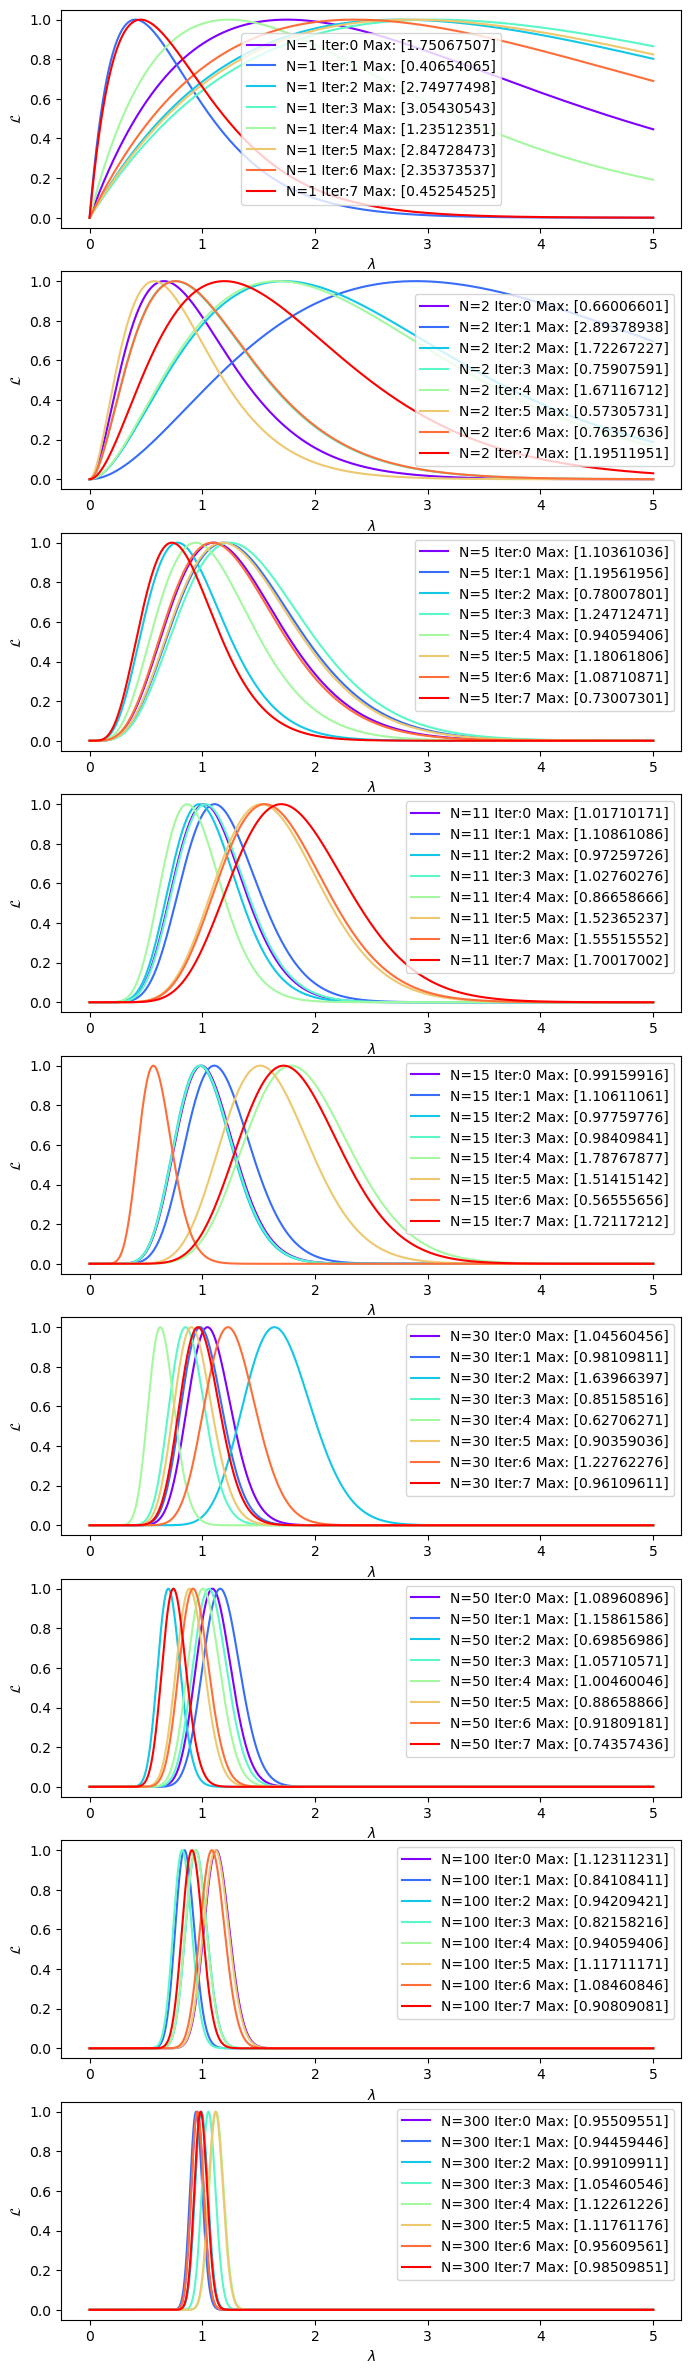

In [5]:
l = np.linspace(0,5,10000)
n_samples = [1,2,5,11,15,30,50,100,300,]
plt.figure(figsize=(8, 30))
color = plt.cm.rainbow(np.linspace(0, 1, 8))
for n in n_samples:
    plt.subplot(len(n_samples), 1, n_samples.index(n)+1)
    plt.xlabel("$\lambda$")
    plt.ylabel("$\mathcal{L}$")
    lambda_mles = []
    for s in range(8):
        y = 1
        for i in range(n):
            y *= l * np.exp(-l * df.values[i+(s*n)][0])
        lambda_mles.append(n / df.iloc[0+s*n:n+s*n].sum()[0])
        ymax = max(y)
        xpos = np.where(y == ymax)
        xmax = l[xpos]
        plt.plot(l, y/ymax, label=f'N={n} Iter:{s} Max: {xmax}', c=color[s])
    plt.legend()
    print(f'lambda_mle (N = {n}) = {lambda_mles}')

The $MLE$ for $\lambda$ however is a biased estimator as it can be proven that

$$
E\left[\hat{\lambda}_{MLE}-\lambda\right]= E\left[\hat{\lambda}_{MLE}-\frac{N}{\sum_{i=1}^N x_i}\right]=\frac{\lambda}{N-1},
$$

however a simple transformation $\hat{\lambda}_{MLE}\rightarrow\frac{N-1}{N}\hat{\lambda}_{MLE}$ will give us an unbiased estimator as $E\left[\frac{N-1}{N}\hat{\lambda}_{MLE}-\lambda\right] = 0$.


Also with non-linear transformation $\lambda\rightarrow\frac{1}{\theta}$, we can reparemetrize the likelihhod as

$$
\mathcal{L}(\lambda; x) = \prod_{i=1}^{N} \frac{1}{\theta} e^{\textstyle - \frac{x_i}{\theta}}.
$$

Then by maximising $\log(\mathcal{L})$, it can be found that
$$
\hat{\theta}_{MLE}=\frac{\sum_{i=1}^N x_i}{N},
$$

which is unbiased as $E\left[\hat{\theta}_{MLE}-\theta\right] = 0$.

theta_mle (N = 1) = [0.5711686419611954, 2.4592284012489314, 0.36368759098048153, 0.3274127472226204, 0.8097603915473774, 0.3512213434893555, 0.42487180029299726, 2.209145972386663]
theta_mle (N = 2) = [1.5151985216050634, 0.345550169101551, 0.5804908675183664, 1.3170088863398302, 0.5983159013854169, 1.7449965629765212, 1.3094885203034388, 0.8367187797673102]
theta_mle (N = 5) = [0.9062515545921211, 0.8363741837879699, 1.282302631540332, 0.8017170760751275, 1.0632996962974803, 0.8470377934165395, 0.9198269312962755, 1.3699256508183288]
theta_mle (N = 11) = [0.9833773744028254, 0.9020998553626921, 1.0281546745834835, 0.9733132076544849, 1.1542654534439558, 0.6563285821466377, 0.6429287753670434, 0.5881648047117587]
theta_mle (N = 15) = [1.0083094566401412, 0.9040181885963825, 1.022837060312609, 1.0160880287101903, 0.5593835969791656, 0.6603605128582797, 1.7678578837679109, 0.5809322565443372]
theta_mle (N = 30) = [0.9561638226182617, 1.0194625445113996, 0.6098720549187227, 1.17439507015

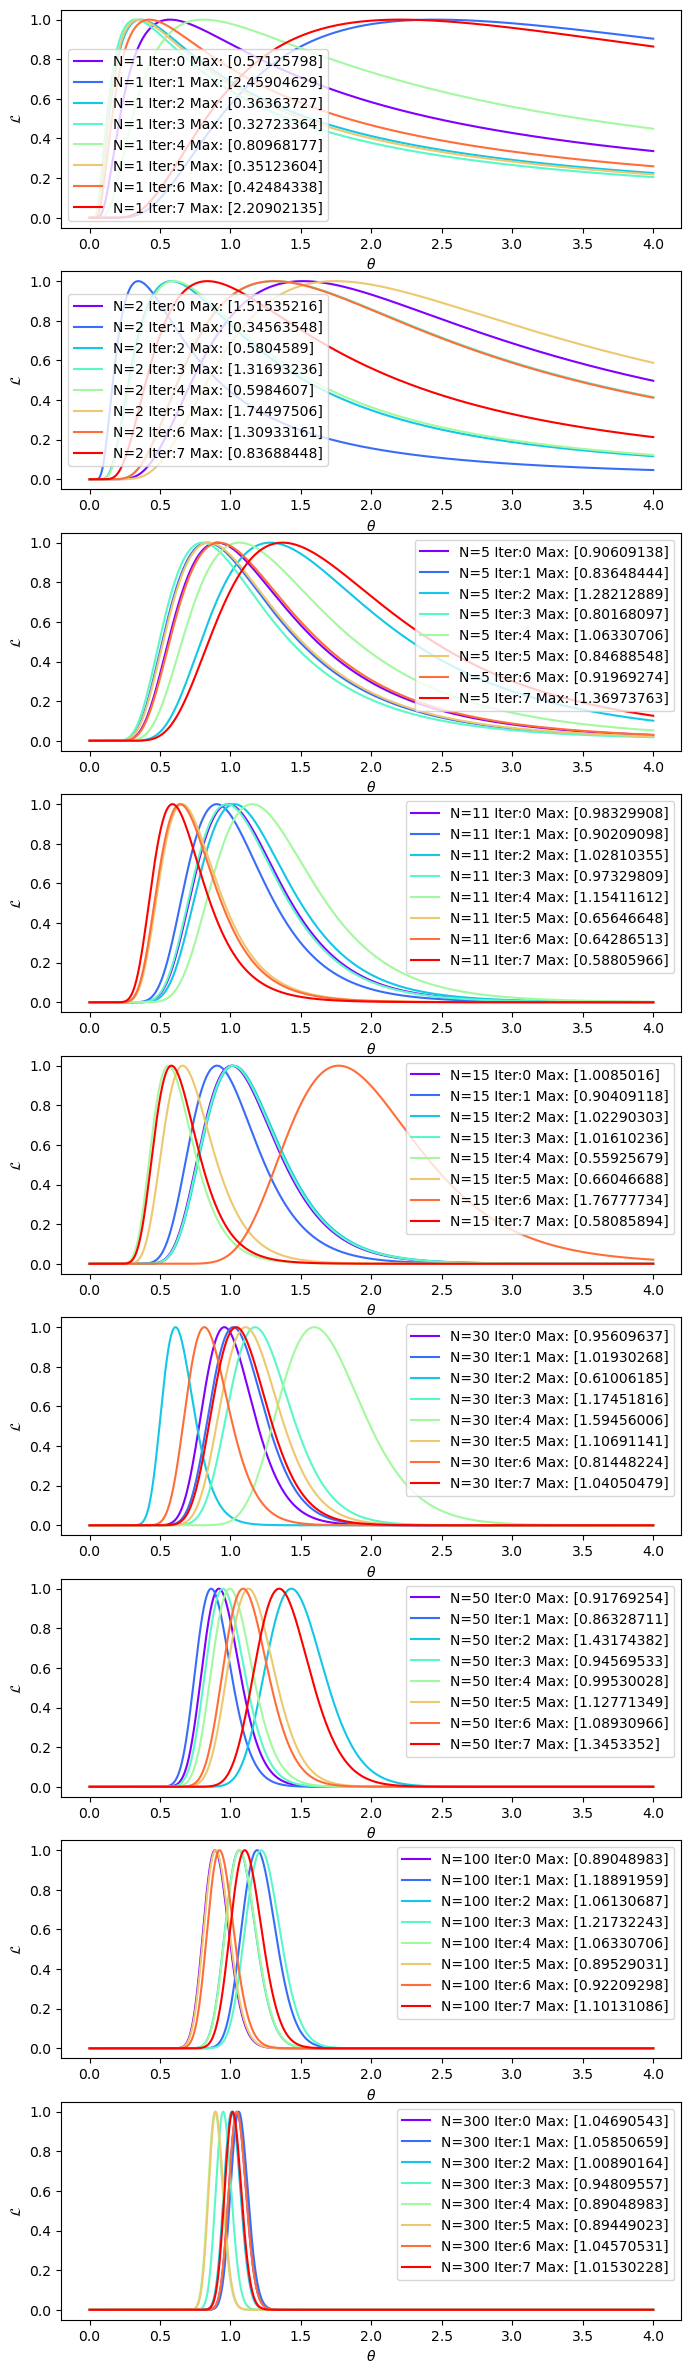

In [6]:
t = np.linspace(0.000001,4,10000)
n_samples_t = [1,2,5,11,15,30,50,100,300,]
plt.figure(figsize=(8, 30))
color_t = plt.cm.rainbow(np.linspace(0, 1, 8))
for n in n_samples_t:
    plt.subplot(len(n_samples), 1, n_samples.index(n)+1)
    plt.xlabel("$\\theta$")
    plt.ylabel("$\mathcal{L}$")
    theta_mles = []
    for s in range(8):
        y = 1
        for i in range(n):
            y *= 1/t*np.exp(-df.values[i+(s*n)][0]/t)
        theta_mles.append(df.iloc[0+s*n:n+s*n].sum()[0]/n)
        #plt.yscale('log')
        ymax = max(y)
        xpos = np.where(y == ymax)
        xmax = t[xpos]
        plt.plot(t, y/ymax, label=f'N={n} Iter:{s} Max: {xmax}', c=color[s])
    plt.legend()
    print(f'theta_mle (N = {n}) = {theta_mles}')

We can see the distribution of the maximums in a more explicit way by having 100 toy samples for each N

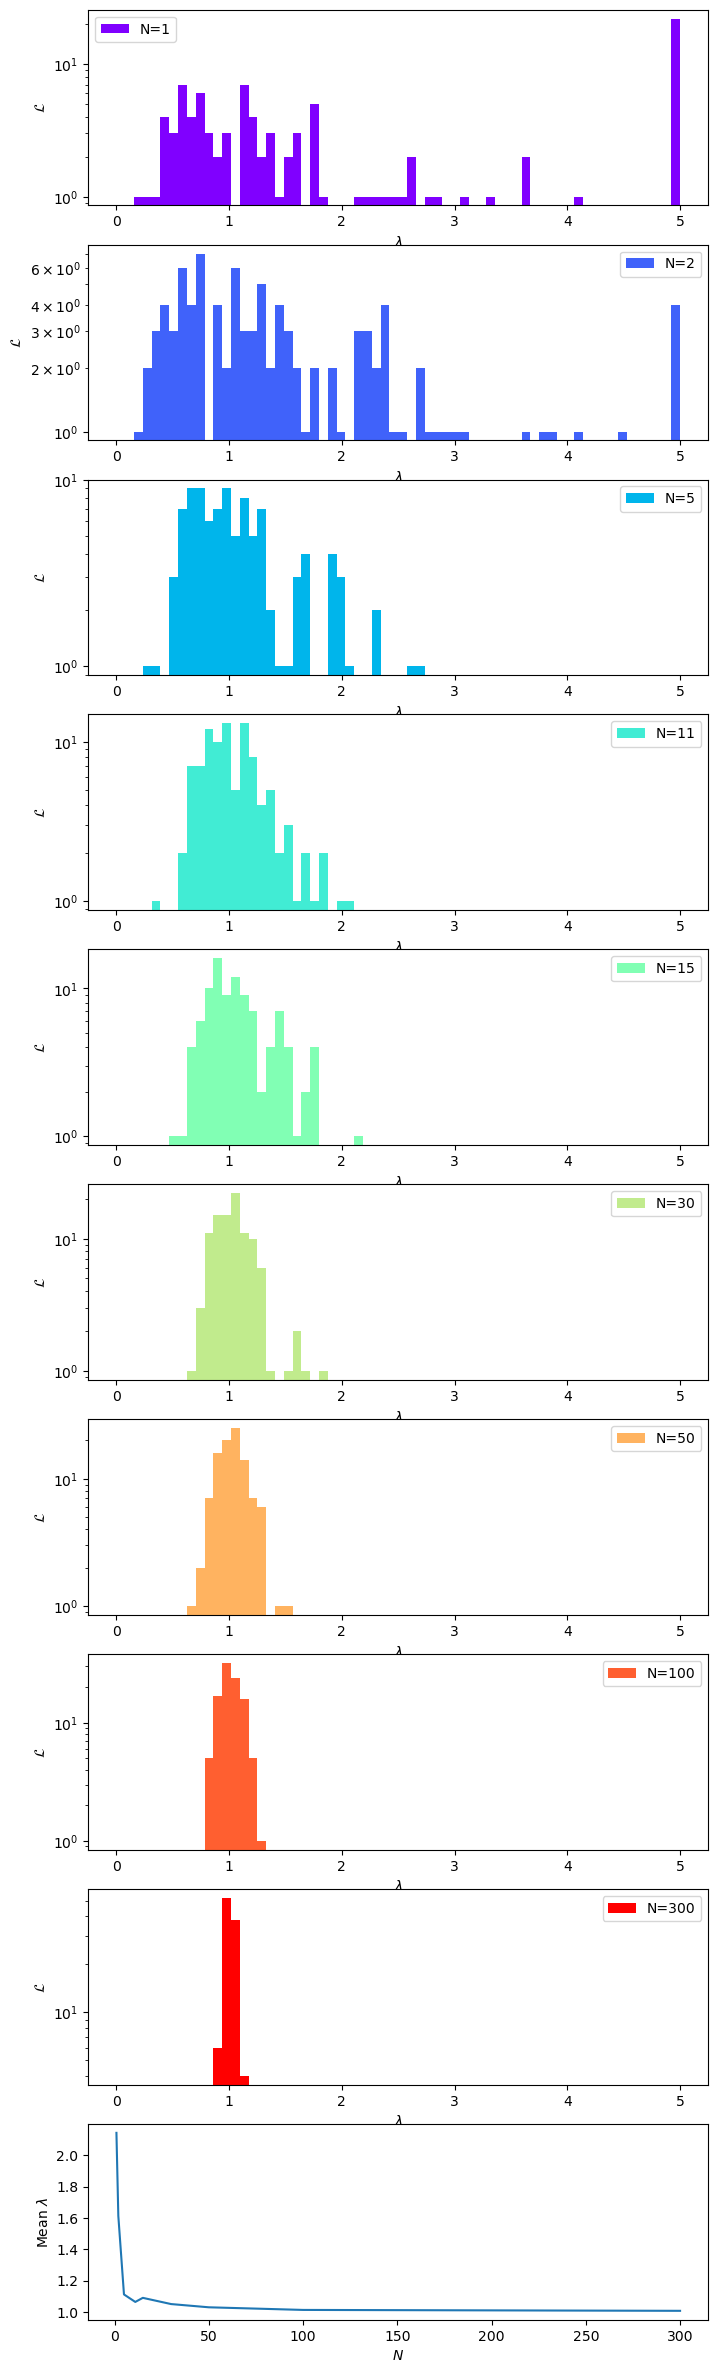

In [7]:
color_v = plt.cm.rainbow(np.linspace(0, 1, len(n_samples)))
plt.figure(figsize=(8, 30))
mean_mles = np.empty([len(n_samples),1], float)
for n in n_samples:
    plt.subplot(len(n_samples)+1, 1, n_samples.index(n)+1)
    plt.xlabel("$\lambda$")
    plt.ylabel("$\mathcal{L}$")
    lambda_mles = np.empty([100,1], float)
    for s in range(100):
        y = 1
        for i in range(n):
            y *= l * np.exp(-l * df.values[i+(s*n)][0])
        plt.yscale('log')
        ymax = max(y)
        xpos = np.where(y == ymax)
        xmax = l[xpos]
        lambda_mles[s] = xmax
    plt.hist(lambda_mles, bins=64, range=(0, 5), label=f'N={n}', color=color_v[n_samples.index(n)])
    plt.legend()
    mean_mles[n_samples.index(n)] = np.mean(lambda_mles)
plt.subplot(len(n_samples)+1, 1, len(n_samples)+1)
plt.xlabel("$N$")
plt.ylabel("Mean $\lambda$")
plt.plot(n_samples, mean_mles)

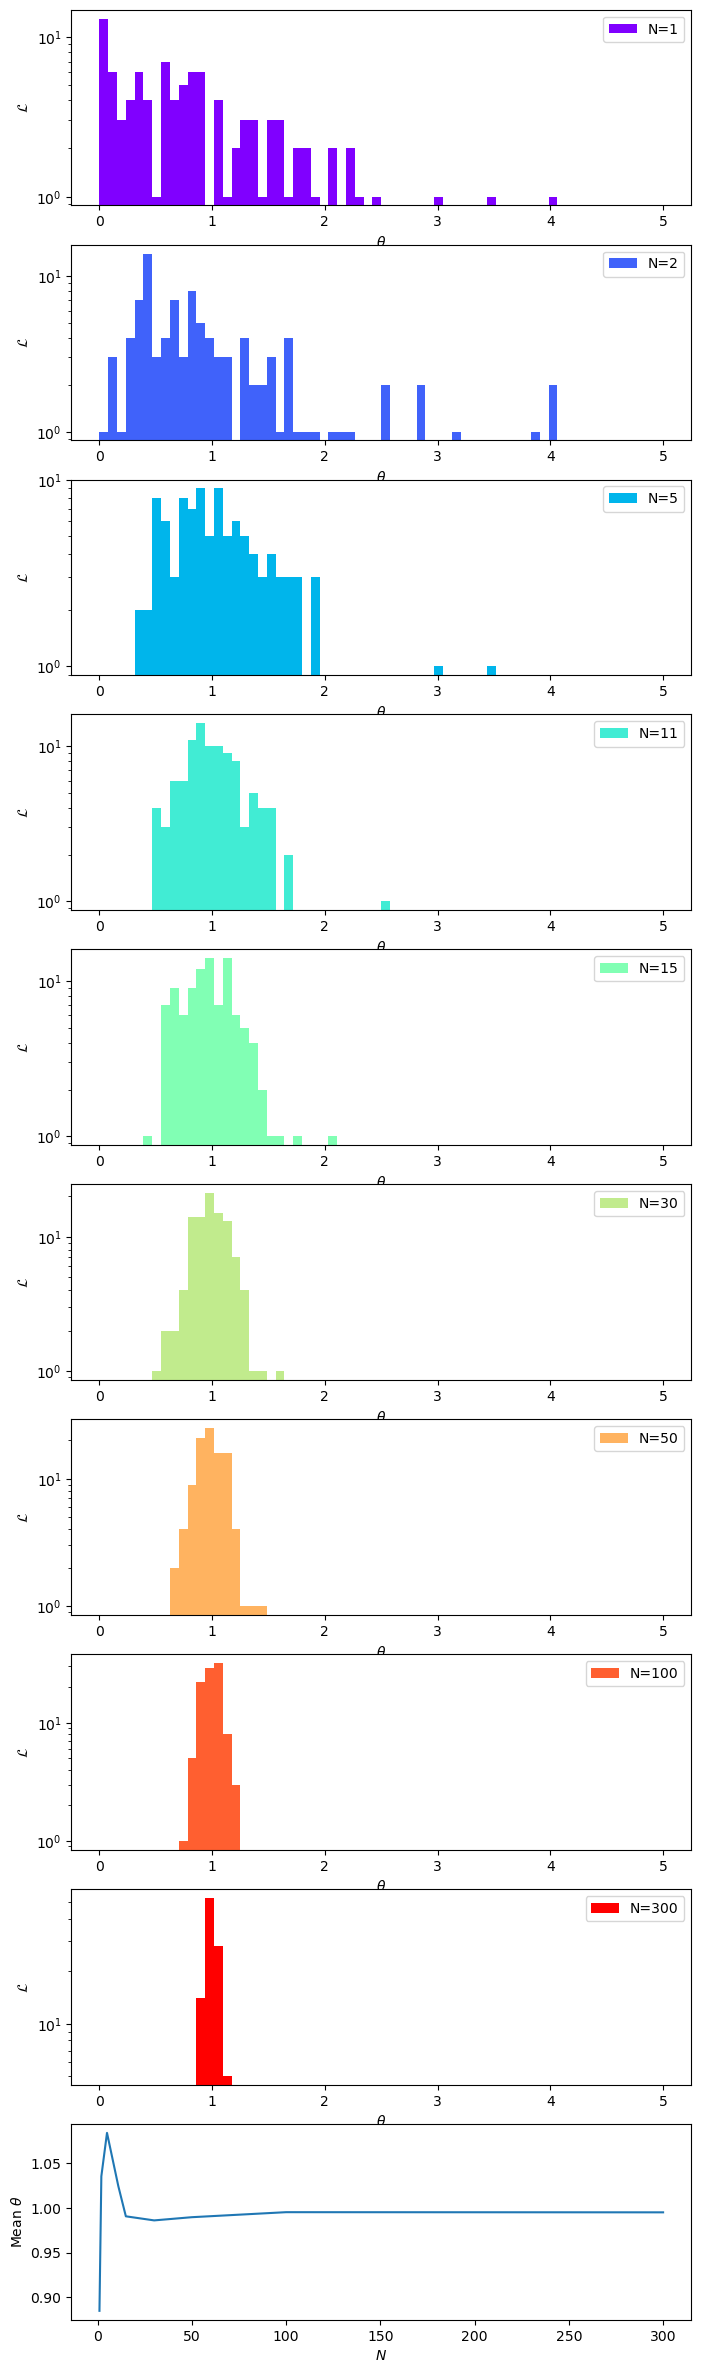

In [8]:
color_v = plt.cm.rainbow(np.linspace(0, 1, len(n_samples)))
plt.figure(figsize=(8, 30))
mean_mles = np.empty([len(n_samples),1], float)
for n in n_samples:
    plt.subplot(len(n_samples)+1, 1, n_samples.index(n)+1)
    plt.xlabel("$\\theta$")
    plt.ylabel("$\mathcal{L}$")
    theta_mles = np.empty([100,1], float)
    for s in range(100):
        y = 1
        for i in range(n):
            y *= 1/t*np.exp(-df.values[i+(s*n)][0]/t)
        plt.yscale('log')
        ymax = max(y)
        xpos = np.where(y == ymax)
        xmax = t[xpos]
        theta_mles[s] = xmax
    plt.hist(theta_mles, bins=64, range=(0,5), label=f'N={n}', color=color_v[n_samples.index(n)])
    plt.legend()
    mean_mles[n_samples.index(n)] = np.mean(theta_mles)
plt.subplot(len(n_samples)+1, 1, len(n_samples)+1)
plt.xlabel("$N$")
plt.ylabel("Mean $\\theta$")
plt.plot(n_samples, mean_mles)

# Score and Fisher's information

The score, whis is defined as the gradient of the log-likelihood function with respect the parameters' vector, is for an exponential distribution

$$
F(\lambda)=\frac{\partial \log\mathcal{L(\lambda)}}{\partial \lambda}=\frac{N}{\lambda}-\sum_{x=1}^N x_{i}
$$

We can see it as function of $\lambda$ for various values of N.

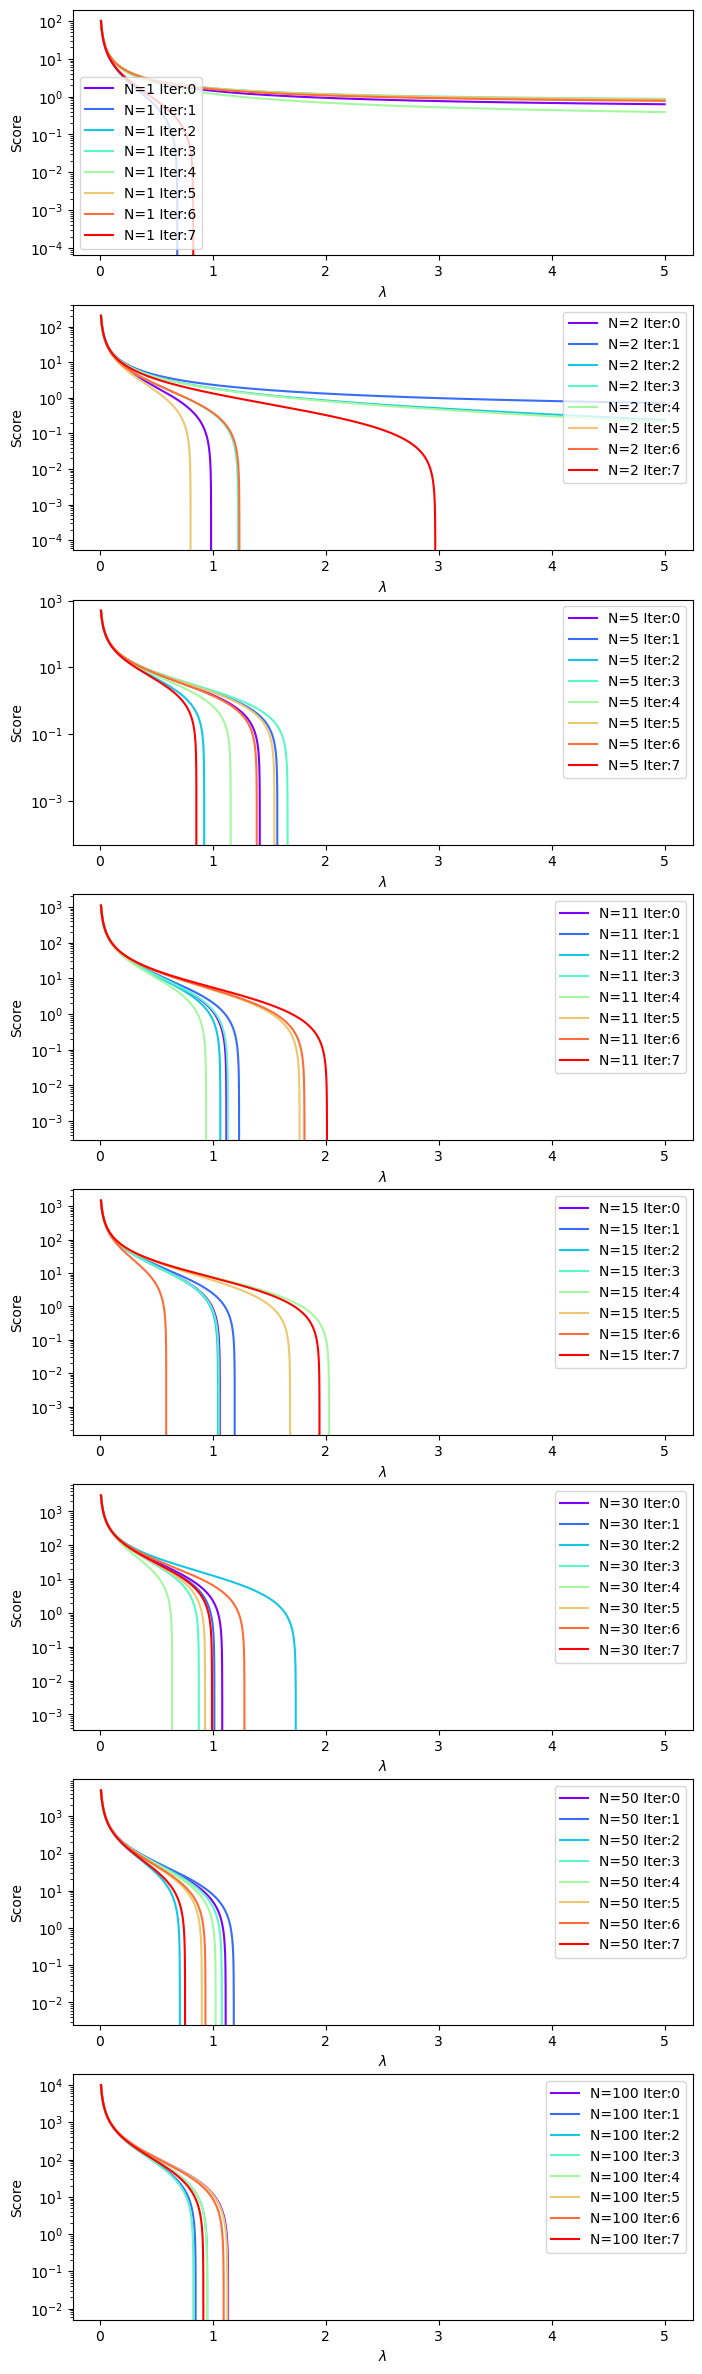

In [9]:
l = np.linspace(0.01,5,10000)
n_samples = [1,2,5,11,15,30,50,100,]
plt.figure(figsize=(8, 30))
color = plt.cm.rainbow(np.linspace(0, 1, len(n_samples)))
for n in n_samples:
    plt.subplot(len(n_samples), 1, n_samples.index(n)+1)
    plt.xlabel("$\lambda$")
    plt.ylabel("Score")
    plt.yscale('log')
    for s in range(8):
        y = n/l - df.iloc[0+s*n:n+s*n].sum()[0]+1
        plt.plot(l, y, label=f'N={n} Iter:{s}', c=color[s])
    plt.legend()

The expected value of the __score__ over the sample space, given $\lambda$, is

$$
E\left[F(x|\lambda)\right] = 0
$$

as we can see below where the distribution of the Score value, computed entry by entry, is plotted.

The Score mean value is 0.0042


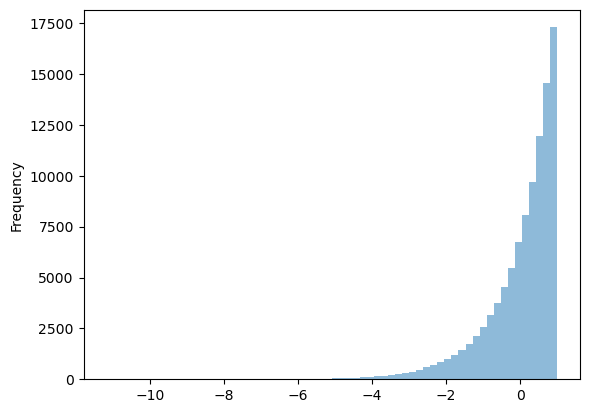

In [10]:
df2 = df 
df2["Score"] = 1 - df2["x"]
ax_score = df2["Score"].plot.hist(bins=64, alpha=0.5)
mean_score = df2.mean()[1]
print(f'The Score mean value is {mean_score:.2}')

From the variance of the Score function the Fisher's information is defined

$$
\mathcal{I}(\lambda)=E\left[F(x;\lambda)^2\right] =E\left[\left( \frac{\partial \log\mathcal{L(x;\lambda)}}{\partial \lambda}\right)^2\right].
$$

The exponential distribution satisfies the regularity conditions and is twice differentiable, therefore its fisher information can be written as

$$
\mathcal{I}(\lambda)= -E\left[ \frac{\partial^2 \log\mathcal{L(x;\lambda)}}{\partial \lambda^2}\right]=\frac{N}{\lambda^2}.
$$

It can be seen how the Fisher's information respects addictivity w.r.t. $N$.

With the Fisher's information we can consider the Cramer-Rao bound, which states that for
- unbiased estimator of the parameter $\vartheta$

$$
\sigma^2(\hat{\vartheta})\geq\frac{1}{\mathcal{I}(\vartheta)}
$$

- biased estimator of the parameter $\vartheta$

$$
\sigma^2(\hat{\vartheta})\geq\frac{[1+b'(\vartheta)]^2}{\mathcal{I}(\vartheta)},
$$
with $b'(\vartheta)$ being the first derivative w.r.t. $\vartheta$ of the bias on the estimator $\hat{\vartheta}$.


REMEMBER: MLEs reach the minimum of the Cramer-Rao bound, for it is efficient!!!


In case of our exponential distribution we can see that we have

- for $\hat{\lambda}_{MLE}$, where $b=\frac{\lambda}{N-1}$

$$
\sigma^2(\hat{\lambda}_{MLE})=\frac{\left[\frac{N}{N-1}\right]^2}{\frac{N}{\lambda^2}}=\frac{N}{\left(N-1\right)^2}\lambda^2 \xrightarrow[]{N \to \infty} \frac{\lambda^2}{N}
$$

- for $\hat{\theta}_{MLE}$, which is unbiased

$$
\sigma^2(\hat{\theta}_{MLE})=\frac{\theta^2}{N},
$$

In [11]:
ZFIT_DISABLE_TF_WARNINGS=1
import zfit

obs = zfit.Space('x', (0, 100))
data = zfit.Data.from_pandas(df, obs=obs)
lambda_var = zfit.Parameter('Lambda', -1.4, -100, 0, step_size=0.2)

/usr/local/anaconda3/lib/python3.10/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [12]:
expo = zfit.pdf.Exponential(obs=obs, lam=lambda_var)
nll_expo = zfit.loss.UnbinnedNLL(expo, data)
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll_expo)
result.errors(method='minuit_minos')
print(result.info['minuit'])

/usr/local/anaconda3/lib/python3.10/site-packages/zfit/minimizers/fitresult.py:1337: ChangedFeatureWarning: The behavior of this functionality recently changed.To turn this warning off, use `zfit.settings.changed_warnings.errors_name = False`  or 'all' with `zfit.settings.changed_warnings.all = False
Default name of errors (which is currently the method name such as `minuit_minos`or `zfit_errors`) has changed to `errors`. Old names are still added as well for compatibility but will be removed in the future. INSTRUCTIONS: to stay compatible, change wherever you access the error to 'errors' or specify the name explicitly in errors(...).
  warn_changed_feature(message, "errors_name")


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -5187                      │              Nfcn = 20               │
│ EDM = 1.16e-06 (Goal: 0.001)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬────

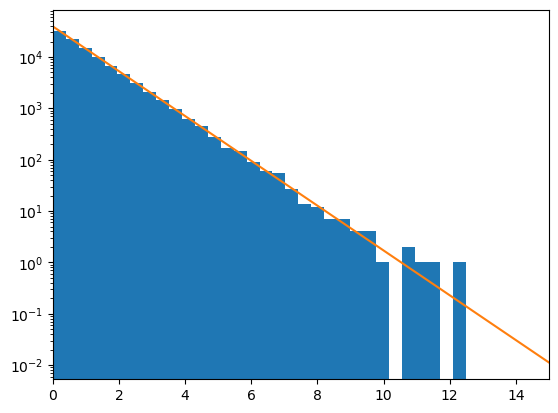

In [13]:
lam = np.linspace(0,15,100000)
y = expo.pdf(lam) * 100000 / 256 * data.data_range.area()
data_plot = data.value()[:, 0] 
plt.hist(data_plot, bins=256, range=(0, 100))
plt.yscale('log')
plt.xlim([0, 15])
plt.plot(lam, y)

Is the extracted value sensible?

How does its uncertainty compare with the Cramer-Rao bound?

Let's repeat woth fewer samples...

In [14]:
n_samples_fit = [2,5,20,120,1000,10000,]
for n in n_samples_fit:
    data = zfit.Data.from_pandas(df.head(n), obs=obs)
    nll_expo = zfit.loss.UnbinnedNLL(expo, data)
    minimizer = zfit.minimize.Minuit()
    result = minimizer.minimize(nll_expo)
    print(f'===============================\nFit {n} Entries')
    print(result.info['minuit'])
    print(f'sqrt(MVB) is {n**0.5/((n-1)):.3}')

Fit 2 Entries
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 999.8                      │              Nfcn = 14               │
│ EDM = 0.000155 (Goal: 0.001)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬

└────────┴──────────┘
sqrt(MVB) is 0.01


In [15]:
bins = [16,32,64,128,256,]
for binn in bins:
    binning = zfit.binned.RegularBinning(binn, 0, 100, name="x")
    obs_bin = zfit.Space("x", binning=binning)
    
    data_binned = data.to_binned(obs_bin)
    expo_binned = zfit.pdf.BinnedFromUnbinnedPDF(expo, obs_bin)
    loss_binned = zfit.loss.BinnedNLL(expo_binned, data_binned)
    result_binned = minimizer.minimize(loss_binned)
    result_binned.errors(method='minuit_minos')
    print(f'===============================\nFit {binn} bins')
    print(result_binned.info['minuit'])

Fit 16 bins
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.507                      │              Nfcn = 17               │
│ EDM = 3.92e-06 (Goal: 0.001)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬──

└────────┴──────────┘


# Truncated exponential from above
We have seen how truncation leads to information loss, this then result in loss of resolution. Let's see if rejecting 60% of events randomly or only in the tail is the same thng or not.

In [21]:
upper_limits = [0.5,]
for upper in upper_limits:
    obs_lim = zfit.Space('x', (0, upper))
    data = zfit.Data.from_pandas(df, obs=obs_lim)
    nll_expo = zfit.loss.UnbinnedNLL(expo, data)
    minimizer = zfit.minimize.Minuit()
    result = minimizer.minimize(nll_expo)
    result.errors(method='minuit_minos')
    print(f'===============================\nUpper limit is {upper}: only 40% of events survive')
    print(result.info['minuit'])
obs_lim = zfit.Space('x', (0, 100))
data = zfit.Data.from_pandas(df.head(40000), obs=obs_lim)
nll_expo = zfit.loss.UnbinnedNLL(expo, data)
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll_expo)
result.errors(method='minuit_minos')
print(f'===============================\nUpper limit is 100 but only 40% of initial events randomly selected')
print(result.info['minuit'])

Upper limit is 0.5: only 40% of events survive
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1000                       │              Nfcn = 13               │
│ EDM = 2.3e-11 (Goal: 0.001)      │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬───

# Truncated exponential from below
Let's see again the loss in resolution between randomly rejecting a fraction of events and rejecting them only form the head.

In [22]:
lower_limits = [0.5,]
for lower in lower_limits:
    obs_lim = zfit.Space('x', (lower, 100))
    data = zfit.Data.from_pandas(df, obs=obs_lim)
    nll_expo = zfit.loss.UnbinnedNLL(expo, data)
    minimizer = zfit.minimize.Minuit()
    result = minimizer.minimize(nll_expo)
    result.errors(method='minuit_minos')
    print(f'===============================\nLower limit is {lower}: only 60% events survive')
    print(result.info['minuit'])
obs_lim = zfit.Space('x', (0, 100))
data = zfit.Data.from_pandas(df.head(60000), obs=obs_lim)
nll_expo = zfit.loss.UnbinnedNLL(expo, data)
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll_expo)
result.errors(method='minuit_minos')
print(f'===============================\nLower limit is 0 but only 60% of initial events randomly selected')
print(result.info['minuit'])

Lower limit is 0.5: only 60% events survive
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -4912                      │              Nfcn = 20               │
│ EDM = 2.88e-06 (Goal: 0.001)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬──────

# Binned samples
